# Introduction

# Data Preprocessing

In [21]:
# Import required libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Set global font size and styles for matplotlib plots
import matplotlib.pyplot as plt
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# This code snippet imports the Pandas library, reads a CSV file from a URL, and creates a deep copy of the DataFrame

import pandas as pd

train_url = 'https://raw.githubusercontent.com/Nayaeun/23Spring_ML_Final/main/train.csv'
df_raw_train = pd.read_csv(train_url)
df_train = df_raw_train.copy(deep=True)

In [6]:
df_train.info()

# The dataset has a total of 15,120 instances (rows) and 56 columns (features) with non-null values and all int64. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [7]:
# Checking the first 5 rows
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [8]:
# Check null values
df_train.isnull().sum().sum() # sum of null values in the dataset

0

In [9]:
# Display dataset's summary statistics
print(df_train.describe())

                Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000         

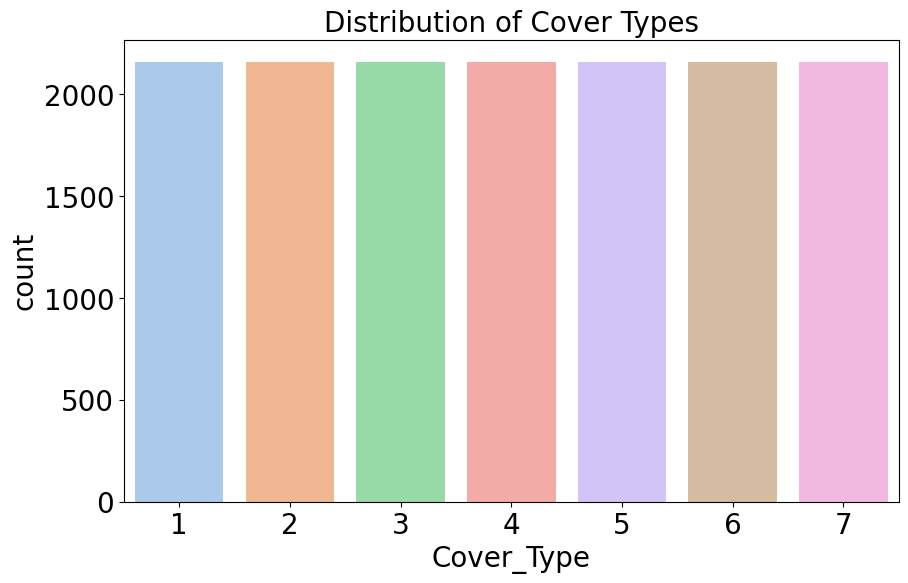

In [22]:
# Visualize the distribution of cover types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Cover_Type', palette='pastel')
plt.title('Distribution of Cover Types')
plt.show()


# 

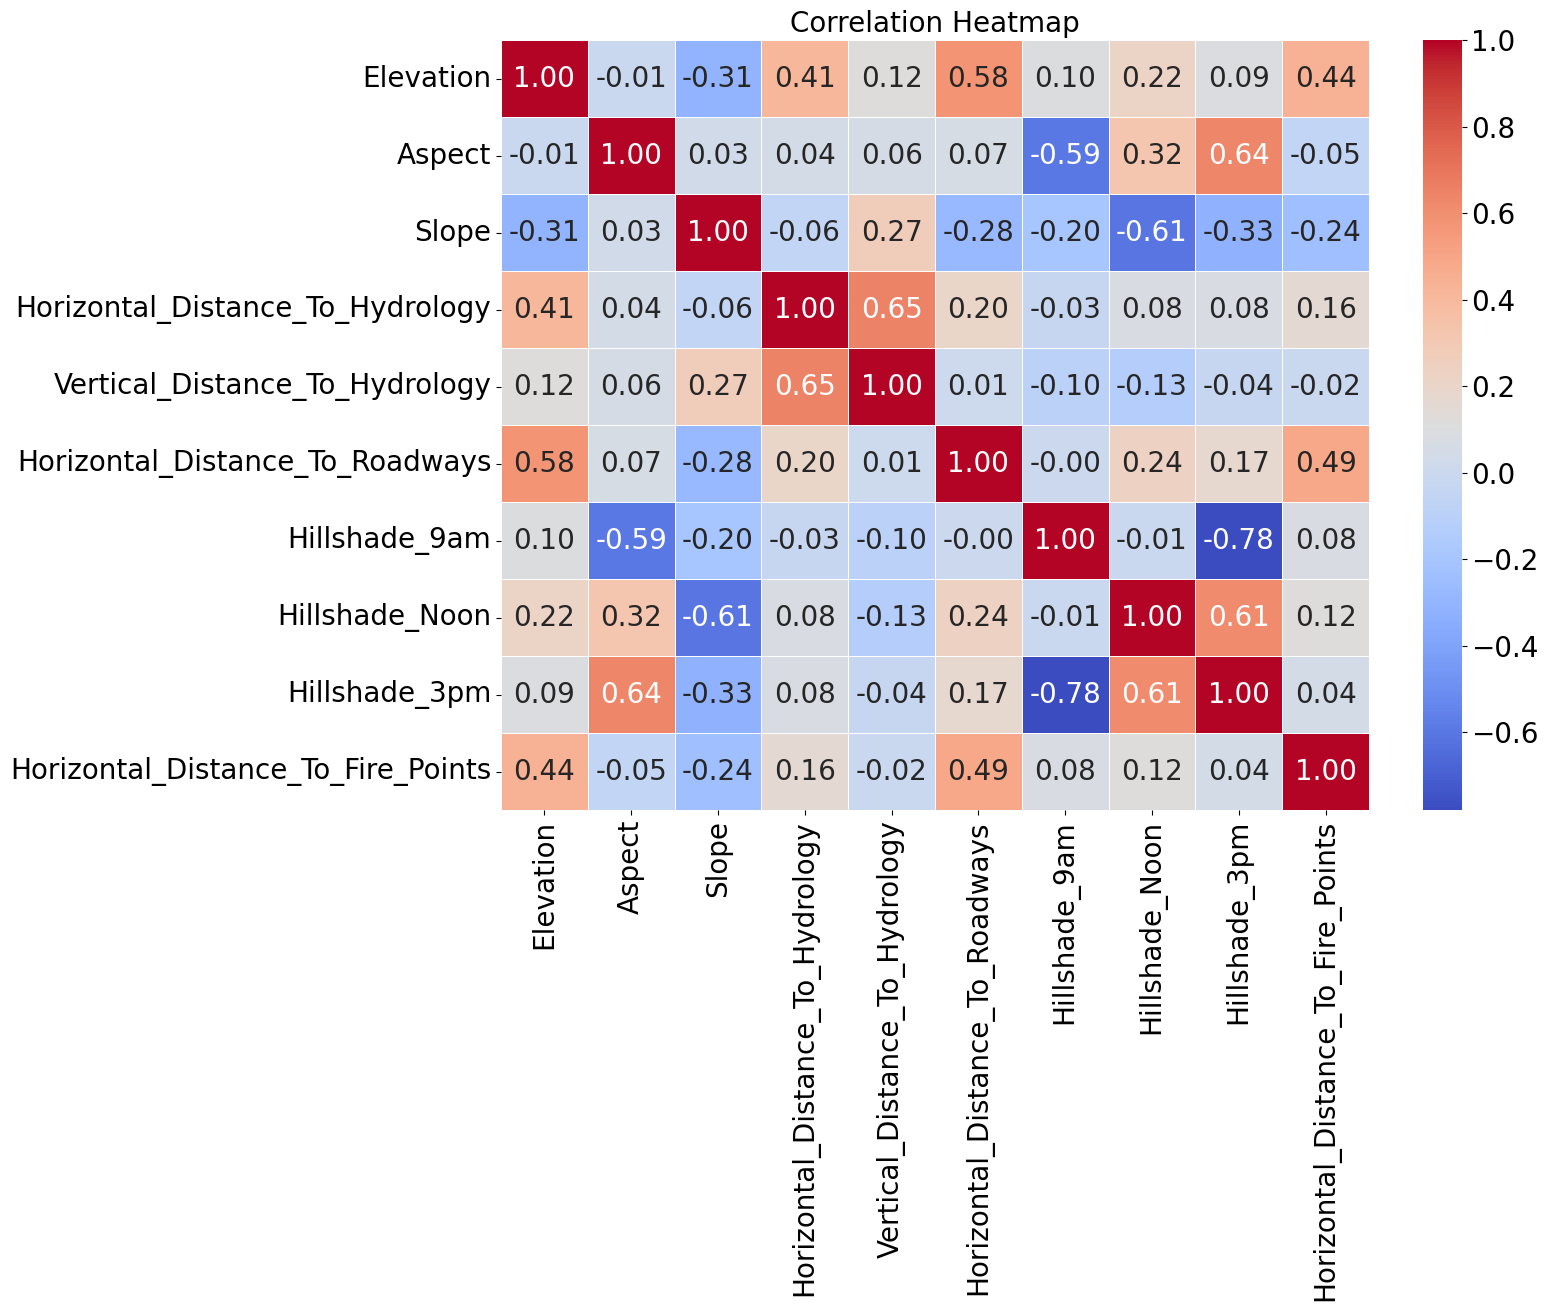

In [11]:
cols = []
for i in df_train.columns:
    if ('soil' in i.lower()) or ('wilderness' in i.lower()) or ('type' in i.lower()) or ('id' in i.lower()):
        continue
    else:
        cols.append(i)
# Compute the correlation matrix
corr_matrix = df_train[cols].corr()
    
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


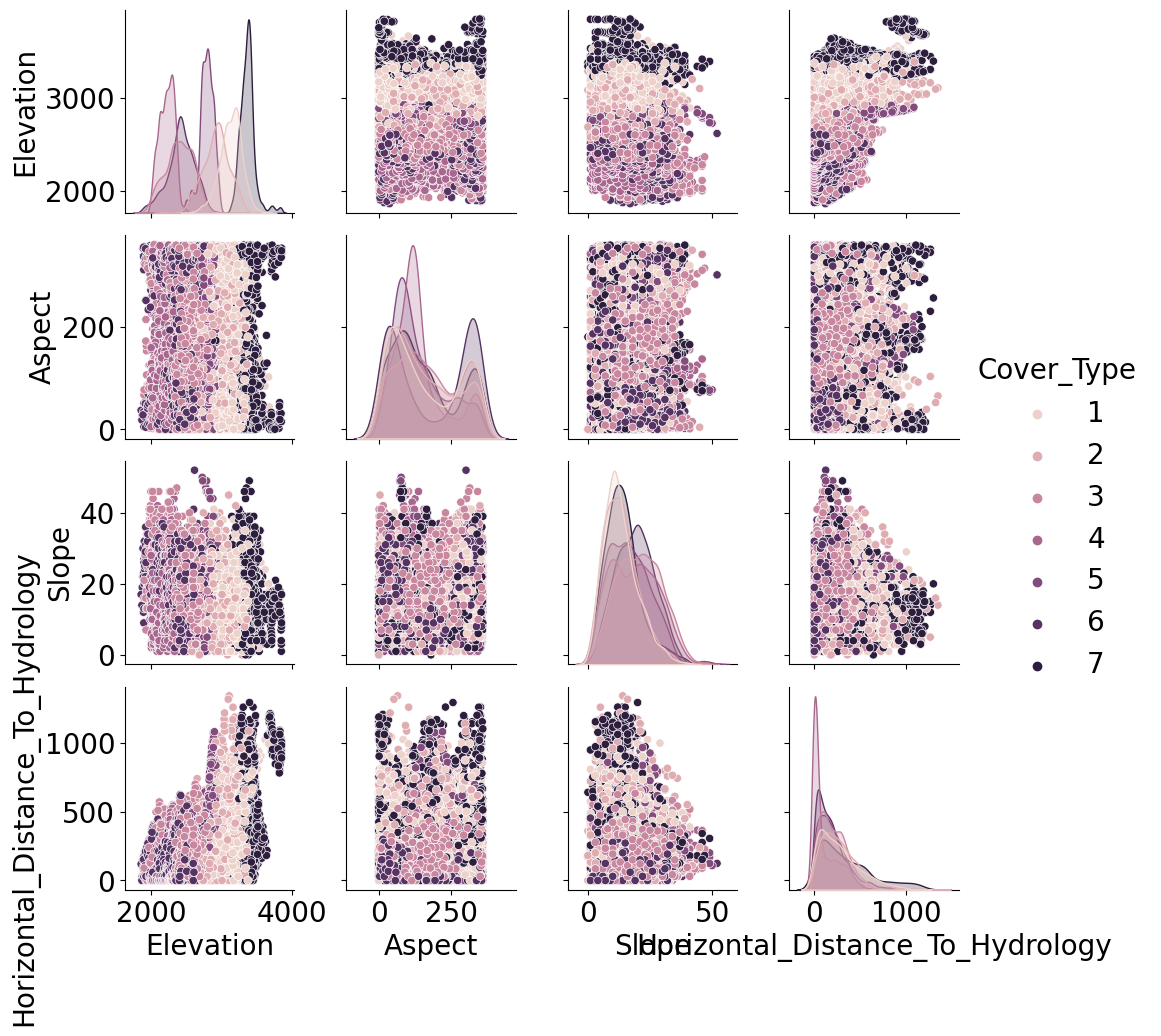

In [12]:
# Visualize relationships between selected features using a pairplot
subset_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Cover_Type']
sns.pairplot(df_train[subset_features], hue='Cover_Type')
plt.show()

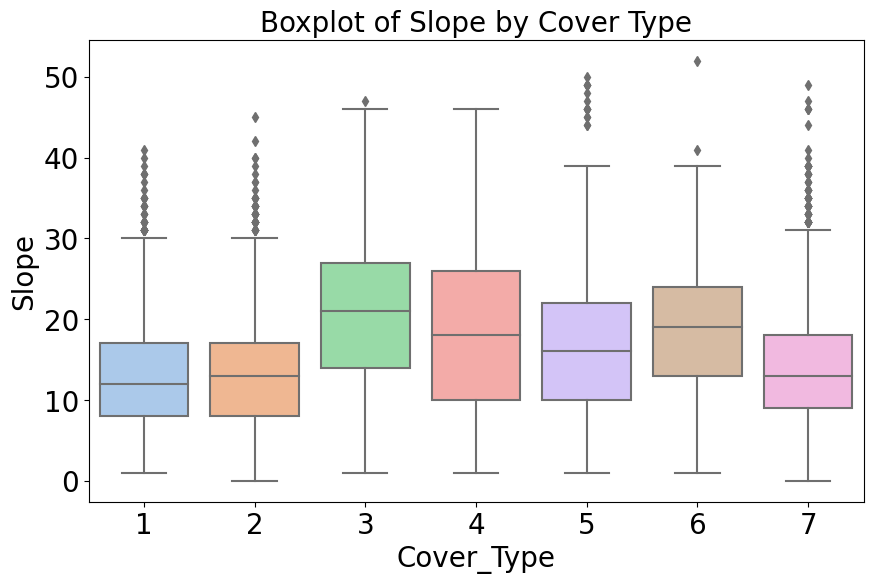

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train, x='Cover_Type', y='Slope', palette='pastel')
plt.title('Boxplot of Slope by Cover Type')
plt.show()

def remove_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for the 'Slope' feature
cleaned_data = remove_outliers(df_train, 'Slope')

In [14]:
df_train.shape, cleaned_data.shape

((15120, 56), (15063, 56))

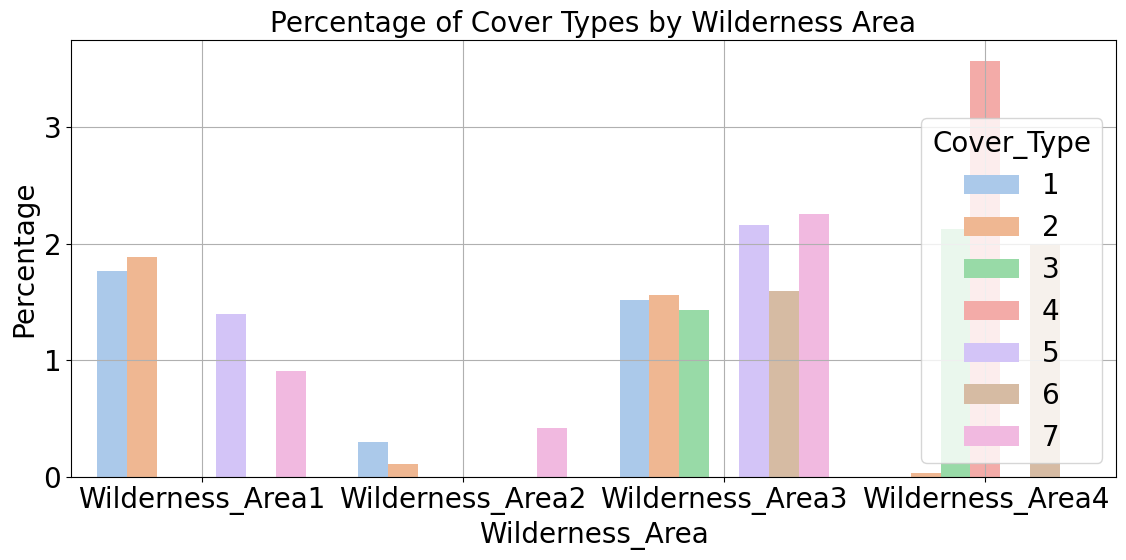

In [25]:
wilderness_cols = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
wilderness_data = cleaned_data.melt(id_vars='Cover_Type', value_vars=wilderness_cols, var_name='Wilderness_Area', value_name='Present')

wilderness_data.head()
plt.figure(figsize=(12, 6))
sns.barplot(data=wilderness_data[wilderness_data['Present'] == 1], x='Wilderness_Area', y='Present', hue='Cover_Type', estimator=lambda x: len(x) / len(wilderness_data) * 100, palette='pastel')
plt.ylabel('Percentage')
plt.grid()
plt.title('Percentage of Cover Types by Wilderness Area')
plt.tight_layout()
plt.show()


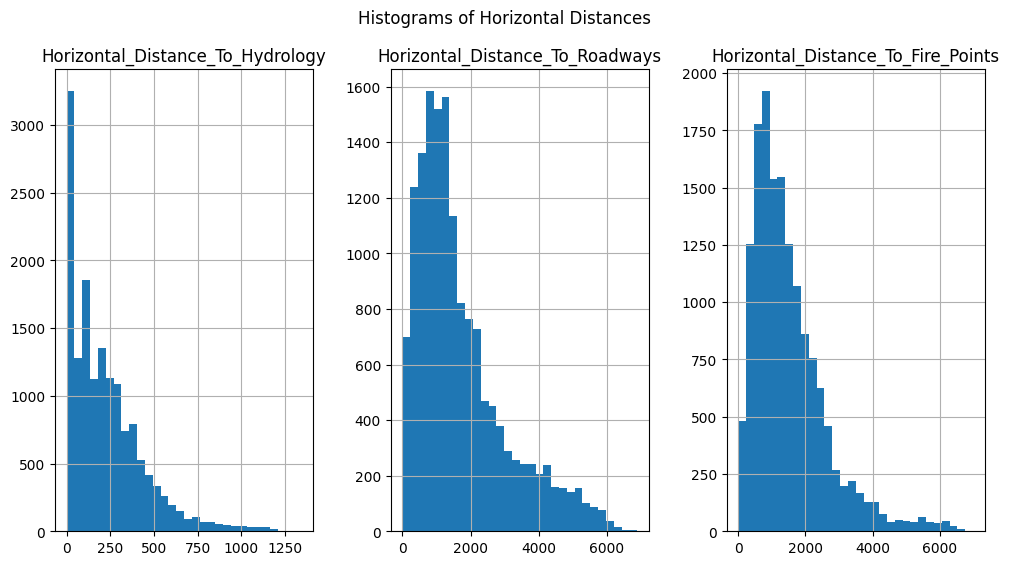

In [34]:
distance_cols = ['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']
df_train[distance_cols].hist(bins=30, figsize=(12, 6), layout=(1, 3))
plt.suptitle('Histograms of Horizontal Distances')
plt.show()


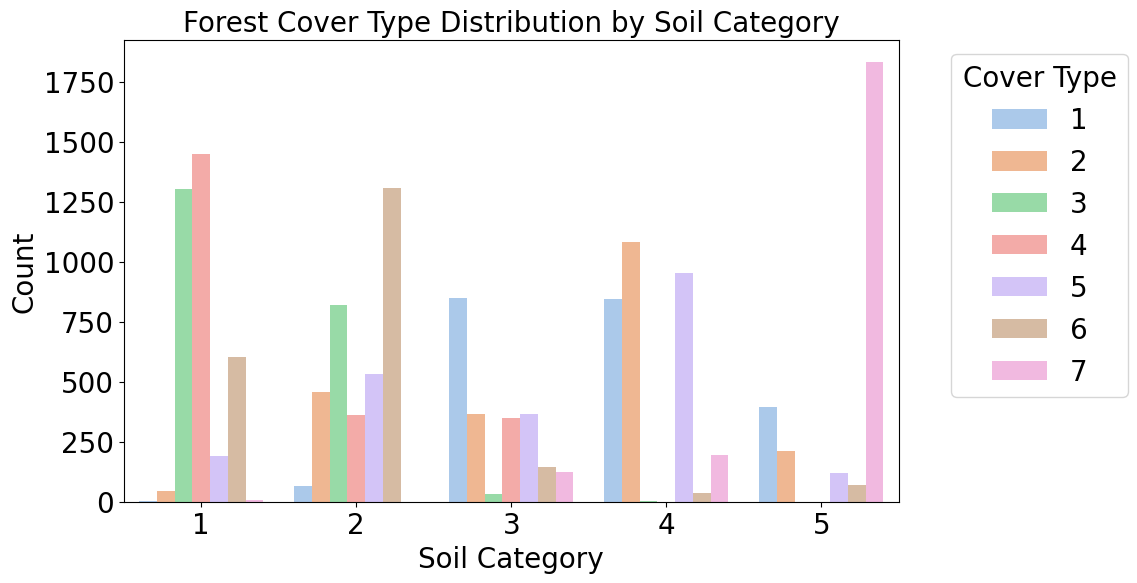

In [27]:
# Assuming the new soil categories are defined as follows:
# Category 1: Soil_Type1 - Soil_Type8
# Category 2: Soil_Type9 - Soil_Type16
# Category 3: Soil_Type17 - Soil_Type24
# Category 4: Soil_Type25 - Soil_Type32
# Category 5: Soil_Type33 - Soil_Type40

def get_soil_category(row):
    for i in range(1, 6):
        if row[f'Soil_Type{(i-1)*8+1}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+2}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+3}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+4}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+5}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+6}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+7}'] == 1:
            return i
        if row[f'Soil_Type{(i-1)*8+8}'] == 1:
            return i
    return np.nan

# Create a new column for the aggregated soil categories
soil_category_cover_type = df_train.groupby(['Soil_Category', 'Cover_Type']).size().unstack().reset_index()

# Melt the data frame to have a long format suitable for seaborn barplot
melted_data = soil_category_cover_type.melt(id_vars='Soil_Category', var_name='Cover_Type', value_name='Count')

# Create seaborn barplot with 'pastel' palette
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Soil_Category', y='Count', hue='Cover_Type', palette='pastel')

plt.xlabel('Soil Category')
plt.ylabel('Count')
plt.title('Forest Cover Type Distribution by Soil Category')
plt.legend(title='Cover Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [19]:
##Training data

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into features (X) and target (y)
X = cleaned_data.drop(columns=["Id", "Cover_Type"])
y = cleaned_data["Cover_Type"]

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the pipeline steps
pipeline_steps = [
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
]

# Create the pipeline
pipeline = Pipeline(pipeline_steps)

# Define the model and hyperparameter options for GridSearchCV
models = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [10, 50, 100],
        'model__max_depth': [None, 10, 20]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7]
    },
    {
        'model': [MLPClassifier()],
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['relu', 'tanh'],
        'model__solver': ['adam'],
        'model__max_iter': [200]
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    }
]

# Create GridSearchCV with the pipeline and model options
grid_search = GridSearchCV(pipeline, models, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best model and its score
print(f"Best model: {grid_search.best_estimator_}")
print(f"Best F1 macro score: {grid_search.best_score_}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 macro score: {test_f1_macro}")

Fitting 5 folds for each of 37 candidates, totalling 185 fits
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.5s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.5s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.5s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   0.5s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=10; total time=   1.4s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=50; total time=   4.1s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=50; total time=   4.2s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimators=50; total time=   4.2s
[CV] END model=RandomForestClassifier(), model__max_depth=None, model__n_estimator

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END model=RandomForestClassifier(), model__max_depth=20, model__n_estimators=100; total time=   5.5s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   2.0s
[CV] END model=RandomForestClassifier(), model__max_depth=20, model__n_estimators=100; total time=   5.4s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   2.8s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   2.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   3.0s
[CV] END model=RandomForestClassifier(), model__max_depth=20, model__n_estimators=100; total time=   6.5s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=3; total time=   2.5s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   2.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   2.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   2.1s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   1.8s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=5; total time=   1.7s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   1.7s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   1.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   1.7s
[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   1.7s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV] END .model=KNeighborsClassifier(), model__n_neighbors=7; total time=   1.8s
[CV] END model=LogisticRegression(), model__solver=newton-cg; total time=   7.5s
[CV] END model=LogisticRegression(), model__solver=newton-cg; total time=   7.1s
[CV] END model=LogisticRegression(), model__solver=newton-cg; total time=   7.6s
[CV] END model=LogisticRegression(), model__solver=newton-cg; total time=   6.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[CV] END ....model=LogisticRegression(), model__solver=lbfgs; total time=   2.8s
[CV] END ....model=LogisticRegression(), model__solver=lbfgs; total time=   2.6s
[CV] END ....model=LogisticRegression(), model__solver=lbfgs; total time=   2.5s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[CV] END ....model=LogisticRegression(), model__solver=lbfgs; total time=   1.9s
[CV] END ....model=LogisticRegression(), model__solver=lbfgs; total time=   2.0s
[CV] END model=LogisticRegression(), model__solver=newton-cg; total time=   7.5s
[CV] END model=LogisticRegression(), model__solver=liblinear; total time=   9.7s
[CV] END model=LogisticRegression(), model__solver=liblinear; total time=   9.5s
[CV] END model=LogisticRegression(), model__solver=liblinear; total time=   9.5s
[CV] END model=LogisticRegression(), model__solver=liblinear; total time=   9.8s
[CV] END model=LogisticRegression(), model__solver=liblinear; total time=  10.7s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  32.6s
[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  32.7s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  35.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  35.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  31.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  37.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  36.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  37.9s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  41.1s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  37.1s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=relu, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  42.9s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  36.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  38.1s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  39.8s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(50,), model__max_iter=200, model__solver=adam; total time=  39.7s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  51.3s


/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  45.0s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=None, model__min_samples_split=5; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  43.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=2; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=2; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=2; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=5; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=5; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=10, model__min_samples_split=10; total time=   0.2s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=20, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__max_depth=20, model__min_samples_split=2; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__criterion=gini, model__

/Users/yoninayoni/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END model=MLPClassifier(), model__activation=tanh, model__hidden_layer_sizes=(100,), model__max_iter=200, model__solver=adam; total time=  38.3s
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])
Best F1 macro score: 0.8501251308768417
Test F1 macro score: 0.8565342004698275


In [ ]:
# df_val = pd.read_csv('C:/Users/Upmanyu/Documents/GWU/machine learning 1/forest-cover-type-prediction/test.csv')
# df_val_1 = df_val.drop(['Id'],axis=1)

In [ ]:
# df_val.columns

In [ ]:
# X_val = scaler.transform(df_val_1)

In [ ]:
# df_val['Cover_Type'] = best_model.predict(X_val)

In [ ]:
# df_val[['Id','Cover_Type']].to_csv('submission.csv',index=False)

Conclusion
